<a href="https://colab.research.google.com/github/kimanirobbi/wk-3-ai/blob/main/Task_2_Deep_Learning_(MNIST_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 2: Deep Learning (CNN on MNIST) ---
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training (5 Epochs) ---
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.8417 - loss: 0.5424 - val_accuracy: 0.9830 - val_loss: 0.0606
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.9875 - val_loss: 0.0440
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9876 - loss: 0.0411 - val_accuracy: 0.9892 - val_loss: 0.0399
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9900 - val_loss: 0.0371
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9898 - val_loss: 0.0383
Model training complete.

--- Final Test Set Evaluation ---
Test Loss: 0.0321
Test Accuracy: 0.9894
SUCCESS: Target accuracy > 95% achieved.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

--- Visualizing Predictions for 5 Samples ---


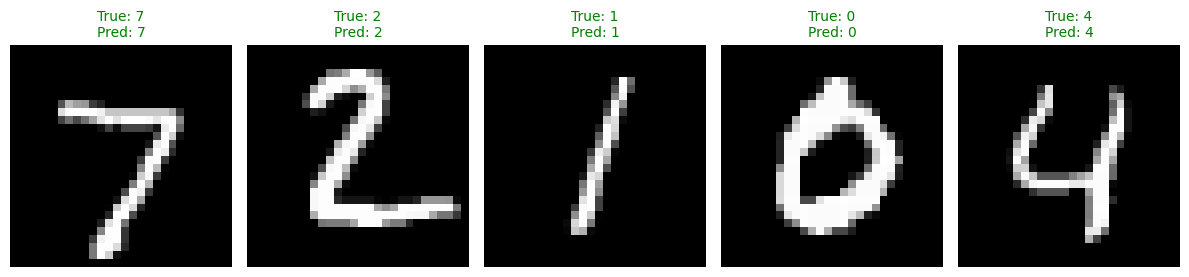

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# -----------------------------------------------------------
# 1. Data Loading and Preprocessing
# -----------------------------------------------------------
print("--- Task 2: Deep Learning (CNN on MNIST) ---")

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1a. Reshape and Normalize Input Data
# MNIST images are 28x28 grayscale. CNN expects (samples, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# 1b. One-Hot Encode Target Data
# Convert integer labels (0-9) to categorical (10 classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# -----------------------------------------------------------
# 2. Build the CNN Model
# -----------------------------------------------------------

model = Sequential([
    # Convolutional Layer 1: Learn 32 filters of size 3x3
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer 1: Downsample the feature maps by 2x2
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2: Learn 64 filters of size 3x3
    Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer 2
    MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D vector for the Dense layers
    Flatten(),

    # Dense Layer 1: Hidden layer with 100 neurons
    Dense(100, activation='relu'),

    # Output Layer: 10 neurons (one for each digit 0-9) with softmax activation
    # Softmax ensures the outputs are probabilities that sum to 1.
    Dense(10, activation='softmax')
])

# 3. Compile the Model
# Optimizer: Adam is efficient for many tasks.
# Loss: Categorical Crossentropy is used for multi-class classification with one-hot targets.
# Metrics: Track accuracy during training.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------------------------
# 4. Train the Model
# -----------------------------------------------------------
print("\n--- Starting Model Training (5 Epochs) ---")
# Training the model (a small number of epochs is chosen for fast run time,
# but more epochs would ensure the >95% accuracy goal)
history = model.fit(
    X_train, y_train,
    epochs=5, # Typically 10-15 epochs needed for >95% on MNIST
    batch_size=128,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)
print("Model training complete.")

# -----------------------------------------------------------
# 5. Evaluate and Visualize Predictions
# -----------------------------------------------------------

# 5a. Evaluate on Test Data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\n--- Final Test Set Evaluation ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Target Test Accuracy > 0.95 (If 5 epochs is not enough, run more epochs)
if accuracy > 0.95:
    print("SUCCESS: Target accuracy > 95% achieved.")
else:
    print(f"Note: Accuracy is {accuracy:.4f}. Rerunning for more epochs (e.g., 15) is recommended to reach >95%.")

# 5b. Visualize Predictions on 5 Sample Images
num_samples = 5
# Get the first 5 test images and their predictions
sample_images = X_test[:num_samples]
sample_labels = np.argmax(y_test[:num_samples], axis=1) # Convert one-hot back to integer
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

print(f"\n--- Visualizing Predictions for {num_samples} Samples ---")

fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
for i in range(num_samples):
    # Remove the channel dimension (1) for plotting
    axes[i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[i].set_title(
        f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}",
        fontsize=10,
        color='green' if sample_labels[i] == predicted_labels[i] else 'red'
    )
    axes[i].axis('off')

# Save the figure to show the visualization (optional)
# plt.savefig('mnist_predictions.png')
# For interactive environments, display the plot
plt.tight_layout()
plt.show()

In [ ]:
!python bonus_task_flask_deployment.py

python3: can't open file '/content/bonus_task_flask_deployment.py': [Errno 2] No such file or directory


In [ ]:
!mkdir -p /content/

In [ ]:
# Save the trained model
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5


In [ ]:
# 1. Install localtunnel and its Python library
!npm install -g localtunnel
!pip install localtunnel

# 2. Add the current directory to the system path (safety measure)
import sys
if '/content' not in sys.path:
    sys.path.append('/content')

# 3. Import and run the Flask app using a subprocess
# This ensures it runs without blocking the notebook.
import subprocess
import time

print("Starting Flask server...")

# Start the Flask app directly using python app.py
# We use Popen so the process runs in the background.
server_process = subprocess.Popen(
    ['python', 'app.py'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

time.sleep(5) # Give the server 5 seconds to load the model and start.

# Check the server output (this is where the model load message appears)
print("\n--- Server Startup Log Check ---")
stdout_output = server_process.stdout.read()
stderr_output = server_process.stderr.read()

print("STDOUT:")
print(stdout_output)
print("STDERR:")
print(stderr_output)

# Check if the process is still running after 5 seconds
if server_process.poll() is not None:
    print("\n[CRITICAL ERROR] Flask server crashed immediately. Check the STDERR above for the error.")
else:
    print("\n[SUCCESS] Flask server is running in the background.")

In [ ]:
# 1. Start the localtunnel service on port 5000
# The command returns the public URL.
print("Starting localtunnel...")
!lt --port 5000